In [4]:
from parfamwarpper import ParFamWrapper

import sympy
import torch
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Collection of function for ParFam to use, can be readily extended

function_dict = {'sqrt': lambda x: torch.sqrt(torch.abs(x)),
                 'exp': lambda x: torch.minimum(torch.exp(x), np.exp(10) + torch.abs(x)),
                 'log': lambda x: torch.log(torch.abs(x) + 0.000001),
                 'cos': torch.cos, 'sin': torch.sin}
function_name_dict = {'sqrt': lambda x: sympy.sqrt(sympy.Abs(x)), 'exp': sympy.exp, 'cos': sympy.cos, 'sin': sympy.sin,
                      'log': lambda x: sympy.log(sympy.Abs(x) + 0.000001)}

standard_function_names_str = ['sin', 'sqrt', 'exp', 'sqrt'] 
standard_functions = [function_dict[key] for key in standard_function_names_str]
standard_function_names = [function_name_dict[key] for key in standard_function_names_str]

# Basic functionality

## One dimensional problem

In [15]:
device = 'cpu'

a = 2 * torch.randn(1)

x = np.arange(1, 5, 0.2)  # 1 dimensional 
x = x.reshape(len(x), 1)  # 1 dimensional 
print(x.shape) 
x = torch.tensor(x, device=device)

def func(a, x, module):
    # return module.sin((a[0] * x + 1) / (0.1 * x + 2))
    # return module.sin((a[0] * x + 1) / (0.1 * x)) 
    # return module.sin((a[0] * x)) 
    # return a[0] * x / (1+x)
    return 0.2 * module.sin(a[0] * x) / x
    # return 0.5 * x / (x + 1)
    # return module.log(x + 1.4) + module.log(x ** 2 + 1.3)
    # return module.sin(x ** 2) * module.cos(x) - 1

y = func(a, x, np).squeeze(1)
x_sym = sympy.symbols('x')

target_expr = func(a, x_sym, sympy)
print(f'Target formula: {target_expr}')

(20, 1)
Target formula: 0.2*sin(2.96786332130432*x)/x


In [16]:
# Assuming we already know that only the sin function is necessary:
functions = [torch.sin]
function_names = [sympy.sin]

In [25]:
parfam = ParFamWrapper(iterate=True, functions=functions, function_names=function_names)
parfam.fit(x, y, time_limit=100)  # time_limit is in seconds, might have to be higher for higher dimensions and more complicated parametric families

/home/philipp/projects/phyiscalLawLearning/parfam/train.py:879: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6
INFO:root:Number of evaluations: 197
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfg

Sequential computation
##### Training #####
Number parameters: 6
Number parameters active: 6
Training time: 0.08990097045898438
Target expression: None
Relative l_2-distance train: 0.660615137530831
Relative l_2-distance validation: 0.6050379265655508
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 2167
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'functions': [], 'function_names': [], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relative l2 distance train

Training time: 1.0112788677215576
Target expression: None
Relative l_2-distance train: 0.734507690548686
Relative l_2-distance validation: 0.6673092518953816
##### Training #####
Number parameters: 9
Number parameters active: 9


INFO:root:Number of evaluations: 2426
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'functions': [], 'function_names': [], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relative l2 distance train

Training time: 1.1613569259643555
Target expression: None
Relative l_2-distance train: 0.6779014308901505
Relative l_2-distance validation: 0.7596150098398503
##### Training #####
Number parameters: 9
Number parameters active: 9


INFO:root:Number of evaluations: 2833
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'functions': [], 'function_names': [], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 2, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relative l2 distance train

Training time: 1.5073013305664062
Target expression: None
Relative l_2-distance train: 0.6618696554980668
Relative l_2-distance validation: 0.8033896620518162
##### Training #####
Number parameters: 12
Number parameters active: 12


INFO:root:Number of evaluations: 2984
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'functions': [], 'function_names': [], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 2, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relative l2 distance train

Training time: 1.5540597438812256
Target expression: None
Relative l_2-distance train: 0.25685691423384893
Relative l_2-distance validation: 0.32986704952195156
##### Training #####
Number parameters: 7
Number parameters active: 7
Training time: 0.12193703651428223
Target expression: None
Relative l_2-distance train: 0.6291047704561842
Relative l_2-distance validation: 0.6552854170796261
##### Training #####
Number parameters: 4
Number parameters active: 4


INFO:root:Number of evaluations: 350
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relati

Training time: 0.18212676048278809
Target expression: None
Relative l_2-distance train: 0.6248913570433395
Relative l_2-distance validation: 0.8466103486950478
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 648
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relat

Training time: 0.35663414001464844
Target expression: None
Relative l_2-distance train: 0.8286034072313887
Relative l_2-distance validation: 1.4006088660904923
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 517
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relati

Training time: 0.27766966819763184
Target expression: None
Relative l_2-distance train: 0.8224138411874445
Relative l_2-distance validation: 1.155660117320551
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1908
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.2446260452270508
Target expression: None
Relative l_2-distance train: 0.41390027408595187
Relative l_2-distance validation: 1.1285029028016824
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 1857
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.1888372898101807
Target expression: None
Relative l_2-distance train: 0.4909861397308923
Relative l_2-distance validation: 0.9397072722798032
##### Training #####
Number parameters: 13
Number parameters active: 13


INFO:root:Number of evaluations: 2124
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.3732662200927734
Target expression: None
Relative l_2-distance train: 0.7387896539234013
Relative l_2-distance validation: 1.9613608083293637
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 2163
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.3910377025604248
Target expression: None
Relative l_2-distance train: 0.8358026875796366
Relative l_2-distance validation: 1.2409224826025755
##### Training #####
Number parameters: 13
Number parameters active: 13


INFO:root:Number of evaluations: 1779
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.1771693229675293
Target expression: None
Relative l_2-distance train: 0.6718846986338475
Relative l_2-distance validation: 1.2229927924964987
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1946
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.2591979503631592
Target expression: None
Relative l_2-distance train: 0.5265161735068175
Relative l_2-distance validation: 0.7939329725449387
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2518
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.8579480648040771
Target expression: None
Relative l_2-distance train: 0.49686907554027254
Relative l_2-distance validation: 0.7665863998683837
##### Training #####
Number parameters: 13
Number parameters active: 13


INFO:root:Number of evaluations: 2275
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.4807484149932861
Target expression: None
Relative l_2-distance train: 0.6743609144737954
Relative l_2-distance validation: 1.034246449184903
##### Training #####
Number parameters: 12
Number parameters active: 12


INFO:root:Number of evaluations: 555
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relat

Training time: 0.4310576915740967
Target expression: None
Relative l_2-distance train: 0.4549975331427666
Relative l_2-distance validation: 0.8961691505207992
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 1499
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 45747, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.0262172222137451
Target expression: None
Relative l_2-distance train: 3.257863811344688e-08
Relative l_2-distance validation: 2.614154564562487e-08
Terminate proccess, wanted accuracy 0.001 and number of active parameters 3 / 10 was reached


In [18]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: 0.2*sin(2.96786332130432*x)/x
Computed formula: -0.2*sin(2.968*x0 - 3.142)/x0


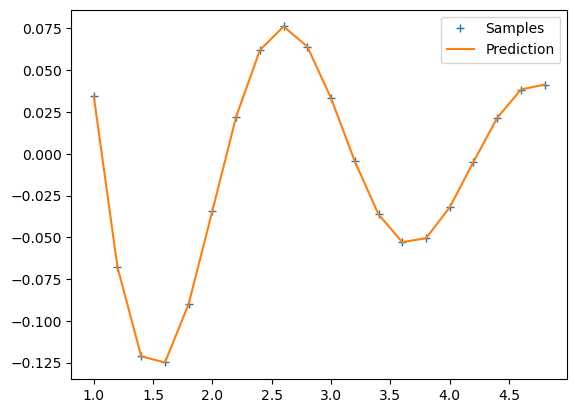

Relative l2 distance: 3.0435891305079156e-08


In [19]:
y_pred = parfam.predict(x).cpu().detach().numpy()
plt.plot(x, y, '+', label='Samples')
plt.plot(x, y_pred, label='Prediction')
plt.legend()
plt.show()

print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')


## 2 dimensional problem

In [22]:
a = 2 * torch.randn(1)
x = np.sort(np.random.uniform(-1.2, 5, 100))
x = np.random.uniform(-3, 3, 200).reshape(100, 2)
print(x.shape)
x = torch.tensor(x, device=device)

def func(a, x, module):
    return module.sin(x[0]) * x[1]


y = func(a, x.T, np)
x_sym = []
for i in range(x.shape[1]):
    x_sym.append(sympy.symbols(f'x{i}'))
target_expr = func(a, x_sym, sympy)
print(f'Target formula: {target_expr}')

(100, 2)
Target formula: x1*sin(x0)


In [23]:
# Assuming we already know that only the sin function is necessary:
functions = [torch.sin]
function_names = [sympy.sin]

In [24]:
parfam = ParFamWrapper(iterate=True, functions=functions, function_names=function_names)
parfam.fit(x, y, time_limit=100)

/home/philipp/projects/phyiscalLawLearning/parfam/train.py:879: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6
INFO:root:Number of evaluations: 202
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfg

Sequential computation
##### Training #####
Number parameters: 6
Number parameters active: 6
Training time: 0.08716201782226562
Target expression: None
Relative l_2-distance train: 0.6390798757103919
Relative l_2-distance validation: 0.527948835035183
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 2094
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'functions': [], 'function_names': [], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relative l2 distance train

Training time: 0.9850146770477295
Target expression: None
Relative l_2-distance train: 0.7678710873017409
Relative l_2-distance validation: 1.6161482714026507
##### Training #####
Number parameters: 9
Number parameters active: 9


INFO:root:Number of evaluations: 2675
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'functions': [], 'function_names': [], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relative l2 distance train

Training time: 1.352752447128296
Target expression: None
Relative l_2-distance train: 0.6317466253690057
Relative l_2-distance validation: 0.561495534666246
##### Training #####
Number parameters: 9
Number parameters active: 9


INFO:root:Number of evaluations: 2937
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'functions': [], 'function_names': [], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 2, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relative l2 distance train

Training time: 1.5001003742218018
Target expression: None
Relative l_2-distance train: 0.6746052790374443
Relative l_2-distance validation: 0.8495787976312675
##### Training #####
Number parameters: 12
Number parameters active: 12


INFO:root:Number of evaluations: 2809
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'functions': [], 'function_names': [], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 2, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relative l2 distance train

Training time: 1.4702353477478027
Target expression: None
Relative l_2-distance train: 0.2638030256029681
Relative l_2-distance validation: 0.5964304019403803
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 331
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relat

Training time: 0.23120856285095215
Target expression: None
Relative l_2-distance train: 0.5648421665973048
Relative l_2-distance validation: 0.7360849365193505
##### Training #####
Number parameters: 4
Number parameters active: 4


INFO:root:Number of evaluations: 311
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relati

Training time: 0.2147374153137207
Target expression: None
Relative l_2-distance train: 0.9284466535099818
Relative l_2-distance validation: 1.1279425135390821
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 472
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relat

Training time: 0.2741892337799072
Target expression: None
Relative l_2-distance train: 0.7568270579542125
Relative l_2-distance validation: 1.2435305648355746
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 666
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relati

Training time: 0.3522014617919922
Target expression: None
Relative l_2-distance train: 0.4225610296339812
Relative l_2-distance validation: 0.5767759244757098
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 2079
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.4696638584136963
Target expression: None
Relative l_2-distance train: 0.6220274627048391
Relative l_2-distance validation: 1.350555208811077
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 1671
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.0789434909820557
Target expression: None
Relative l_2-distance train: 0.6587190565806093
Relative l_2-distance validation: 0.8603046545015597
##### Training #####
Number parameters: 13
Number parameters active: 13


INFO:root:Number of evaluations: 2139
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.452894687652588
Target expression: None
Relative l_2-distance train: 0.63963753415095
Relative l_2-distance validation: 0.9996635148915202
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 2011
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.2575712203979492
Target expression: None
Relative l_2-distance train: 0.6272443798081365
Relative l_2-distance validation: 1.4379137435290765
##### Training #####
Number parameters: 13
Number parameters active: 13


INFO:root:Number of evaluations: 1977
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.2693769931793213
Target expression: None
Relative l_2-distance train: 0.6023053201980322
Relative l_2-distance validation: 0.9373129138041573
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 3250
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.9921941757202148
Target expression: None
Relative l_2-distance train: 0.708594731124802
Relative l_2-distance validation: 0.7390636582048601
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 1662
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.0596230030059814
Target expression: None
Relative l_2-distance train: 0.491555336855121
Relative l_2-distance validation: 1.183580698203161
##### Training #####
Number parameters: 13
Number parameters active: 13


INFO:root:Number of evaluations: 2218
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.4305682182312012
Target expression: None
Relative l_2-distance train: 0.41239509432135113
Relative l_2-distance validation: 0.7005211639826711
##### Training #####
Number parameters: 12
Number parameters active: 12


INFO:root:Number of evaluations: 892
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relat

Training time: 0.7307045459747314
Target expression: None
Relative l_2-distance train: 0.33854388480153497
Relative l_2-distance validation: 0.4230692910967303
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 1571
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 89017, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 100, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.0955731868743896
Target expression: None
Relative l_2-distance train: 3.42689503548114e-08
Relative l_2-distance validation: 2.993669949976051e-08
Terminate proccess, wanted accuracy 0.001 and number of active parameters 3 / 10 was reached


INFO:root:Best distance (train, val, test): (tensor(3.4269e-08, dtype=torch.float64), tensor(2.9937e-08, dtype=torch.float64), tensor(3.1340e-08, dtype=torch.float64))
INFO:root:Best formula: -1.0*x1*sin(1.0*x0 - 3.142) best training time: 1.0955731868743896


In [26]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')


Target formula: x1*sin(x0)
Computed formula: -1.0*x1*sin(1.0*x0 - 3.142)


In [27]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 3.153275800413454e-08


# More complicated functions

Test now the feynman formula III 10 19:
$$mom\sqrt{Bx^2+By^2+Bz^2}$$

In [33]:
x = np.random.uniform(1, 5, 1000).reshape(200, 5)
print(x.shape)
x = torch.tensor(x, device=device)

def func(x, module):
    return x[0] * (x[1]*(x[2]**2 + x[3]**2 + x[4]**2))**(1/2)


y = func(x.T, np)
x_sym = [sympy.symbols(symbol) for symbol in ['mom', 'B', 'x', 'y', 'z']]
# for i in range(x.shape[1]):
#     x_sym.append(sympy.symbols(f'x{i}'))
target_expr = func(x_sym, sympy)
print(f'Target formula: {target_expr}')

(200, 5)
Target formula: mom*(B*(x**2 + y**2 + z**2))**0.5


In [34]:
# Assuming we already know that only the sqrt function is necessary.
# If we do not assume this knowledge, we could also just use the variable standard_functions and standard_function_names instead, it just takes more time.
# Do not define the sqrt here yourself by just defining it as torch.sqrt, since it is not defined on all reals, which is a problem for the optimizer. Thus, see how it was defined in the function_dict.  
functions = [function_dict['sqrt']]
function_names = [function_name_dict['sqrt']]

In [42]:
# ParFamWrapper with its most important input parameters
parfam = ParFamWrapper(iterate=True, # iterate through multiple different parametric families (costs more time, but is the better choice when one is not sure about the degrees and the functions of the target formula)
                       functions=functions, function_names=function_names, # which functions to use 
                       degree_input_numerator=3, degree_output_numerator=3, degree_input_denominator=0, degree_output_denominator=0,  # the maximal degrees of the polynomials in the parametric family
                       input_names=x_sym,  # the names of the input variables
                       enforce_function=False,  # has only an effect, if iterate=False
                       device='cpu', 
                       separate_test_set=True  # ParFam uses a smaller set for training, to use a part of it as a test set afterwards
                       )
parfam.fit(x, y, time_limit=100)  # If we cannot assume that degree_input_denominator=0 and degree_output_denominator=0 holds, we would have to increase the time limit

/home/philipp/projects/phyiscalLawLearning/parfam/train.py:879: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Number parameters: 56
INFO:root:Number parameters active: 56


Sequential computation
##### Training #####
Number parameters: 56
Number parameters active: 56


INFO:root:Number of evaluations: 2385
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'functions': [], 'function_names': [], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Relative l2 distance train

Training time: 1.910660982131958
Target expression: None
Relative l_2-distance train: 0.007152102024665862
Relative l_2-distance validation: 0.013922500591667672
##### Training #####
Number parameters: 13
Number parameters active: 13


INFO:root:Number of evaluations: 1471
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 0.991570234298706
Target expression: None
Relative l_2-distance train: 0.18006878217956968
Relative l_2-distance validation: 0.15125850767564913
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 747
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relati

Training time: 0.4009227752685547
Target expression: None
Relative l_2-distance train: 0.3939618335933649
Relative l_2-distance validation: 0.46435160997563657
##### Training #####
Number parameters: 28
Number parameters active: 28


INFO:root:Number of evaluations: 2322
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.5642611980438232
Target expression: None
Relative l_2-distance train: 0.03803435072375598
Relative l_2-distance validation: 0.10524694980415795
##### Training #####
Number parameters: 22
Number parameters active: 22


INFO:root:Number of evaluations: 2194
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.2524845600128174
Target expression: None
Relative l_2-distance train: 0.18734859758844805
Relative l_2-distance validation: 0.22815361716702784
##### Training #####
Number parameters: 63
Number parameters active: 63


INFO:root:Number of evaluations: 2011
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 3, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 1.7403860092163086
Target expression: None
Relative l_2-distance train: 0.021086857054629163
Relative l_2-distance validation: 0.06532216178652182
##### Training #####
Number parameters: 57
Number parameters active: 57


INFO:root:Number of evaluations: 3819
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 3, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 2.456397294998169
Target expression: None
Relative l_2-distance train: 0.3004267802809783
Relative l_2-distance validation: 0.5613885925155011
##### Training #####
Number parameters: 33
Number parameters active: 33


INFO:root:Number of evaluations: 2022
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 2.8380074501037598
Target expression: None
Relative l_2-distance train: 0.03250158844907296
Relative l_2-distance validation: 0.03693704278537946
##### Training #####
Number parameters: 12
Number parameters active: 12


INFO:root:Number of evaluations: 1209
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 1.3092896938323975
Target expression: None
Relative l_2-distance train: 0.12756138146207208
Relative l_2-distance validation: 0.1750087878327756
##### Training #####
Number parameters: 48
Number parameters active: 48


INFO:root:Number of evaluations: 2840
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 4.530186176300049
Target expression: None
Relative l_2-distance train: 0.01487175051649039
Relative l_2-distance validation: 0.035073850303931974
##### Training #####
Number parameters: 27
Number parameters active: 27


INFO:root:Number of evaluations: 2893
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Relat

Training time: 3.113976001739502
Target expression: None
Relative l_2-distance train: 0.02095731330190692
Relative l_2-distance validation: 0.03360830942893274
##### Training #####
Number parameters: 83
Number parameters active: 83


INFO:root:Number of evaluations: 4663
INFO:root:Training parameters: {'model': 'ParFamTorch', 'repetitions': 1, 'parallel': False, 'seed': 21098, 'device': 'cpu', 'target_noise': 0, 'feature_noise': 0, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_n_active_parameters': 10, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.0001, 'lambda_1_piecewise': 0.0, 'lambda_1_cut': 0.0, 'max_dataset_length': 200, 'classifier': None, 'local_minimizer': 'bfgs', 'lambda_1_finetuning': 0.01, 'iterative_finetuning': True, 'pruning_iterations': 1}
INFO:root:Model parameters: {'degree_input_polynomials': 3, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Rela

Training time: 7.557249069213867
Target expression: None
Relative l_2-distance train: 1.1858948465586235e-07
Relative l_2-distance validation: 3.2551980710214445e-07
Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached


INFO:root:Best distance (train, val, test): (tensor(1.1859e-07, dtype=torch.float64), tensor(3.2552e-07, dtype=torch.float64), tensor(2.6376e-07, dtype=torch.float64))
INFO:root:Best formula: 0.714*x0*sqrt(Abs(1.962*x1*x2**2 + 1.962*x1*x3**2 + 1.962*x1*x4**2)) best training time: 7.557249069213867


In [43]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')


Target formula: mom*(B*(x**2 + y**2 + z**2))**0.5
Computed formula: 1.0001098699643*x0*sqrt(Abs(x1*(x2**2 + x3**2 + x4**2)))


In [44]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 8.363521855078646e-08
